In [1]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint
from scipy import stats
import scipy.linalg as lin

In [2]:
## Full Hodgkin-Huxley Model 

# Constants
C_m  =   1.0 # membrane capacitance, in uF/cm^2
g_Na = 120.0 # maximum conducances, in mS/cm^2
g_K  =  36.0
g_L  =   0.3
E_Na =  50.0 # Nernst reversal potentials, in mV
E_K  = -77.0
E_L  = -54.387

In [3]:
# Channel gating kinetics
# Functions of membrane voltage
def alpha_m(V): return 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))
def beta_m(V):  return 4.0*np.exp(-(V+65.0) / 18.0)
def alpha_h(V): return 0.07*np.exp(-(V+65.0) / 20.0)
def beta_h(V):  return 1.0/(1.0 + np.exp(-(V+35.0) / 10.0))
def alpha_n(V): return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))
def beta_n(V):  return 0.125*np.exp(-(V+65) / 80.0)

In [4]:
# Membrane currents (in uA/cm^2)
#  Sodium (Na = element name)
def I_Na(V,m,h):return g_Na * m**3 * h * (V - E_Na)
#  Potassium (K = element name)
def I_K(V, n):  return g_K  * n**4     * (V - E_K)
#  Leak
def I_L(V):     return g_L             * (V - E_L)

In [5]:
# External current
def I_inj(t): # step up 10 uA/cm^2 every 100ms for 400ms
    return 10*(t>100) - 10*(t>200) + 35*(t>300)
    #return 10*t

In [22]:
# The time to integrate over
t = np.arange(0.0, 400.0, 0.1)

In [7]:
# Integrate!
def dALLdt(X, t):
    V, m, h, n = X
    
    #calculate membrane potential & activation variables
    dVdt = (I_inj(t) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
    dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
    return dVdt, dmdt, dhdt, dndt

In [8]:
X = odeint(dALLdt, [-65, 0.05, 0.6, 0.32], t)
V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]
ina = I_Na(V,m,h)
ik = I_K(V, n)
il = I_L(V)

In [9]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Membrane Potential (mV)')

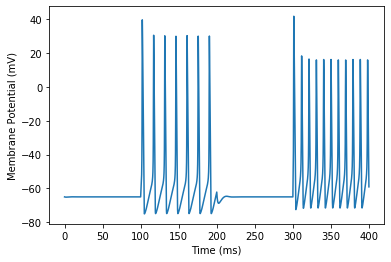

In [23]:
plt.plot(t, V)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')

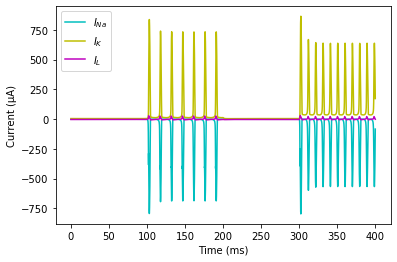

In [11]:
plt.plot(t, ina, 'c', label='$I_{Na}$')
plt.plot(t, ik, 'y', label='$I_{K}$')
plt.plot(t, il, 'm', label='$I_{L}$')
plt.xlabel('Time (ms)')
plt.ylabel('Current (μA)')
plt.legend()

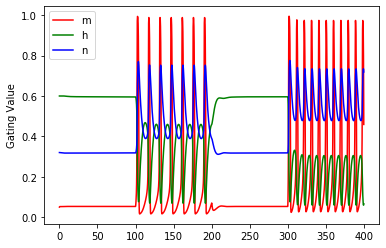

In [19]:
plt.plot(t, m, 'r', label='m')
plt.plot(t, h, 'g', label='h')
plt.plot(t, n, 'b', label='n')
plt.ylabel('Gating Value')
plt.legend()

(-1, 31)

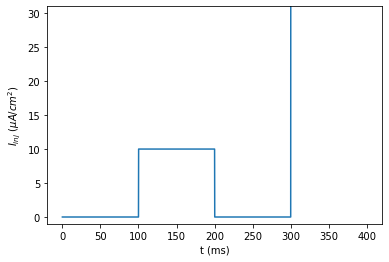

In [13]:
plt.subplot(1,1,1)
plt.plot(t, I_inj(t))
plt.xlabel('t (ms)')
plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
plt.ylim(-1, 31)